# FCB 4.7. Monte Carlo Simulation

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm, gamma, gaussian_kde
import matplotlib.pyplot as plt
from random import random, seed

In [2]:
sigma_mc = gamma.rvs(a=10, scale=1/2.5, size=30)

theta_mc = []
for i in range(len(sigma_mc)):
    theta_mc.append(norm.rvs(loc=4.1, scale = np.sqrt((1/sigma_mc[i])/20), size=30))

y_mc = []
for i in range(len(sigma_mc)):
    sigma = sigma_mc[i]
    for j in range(len(theta_mc[i])):
        theta = theta_mc[i][j]
        y_mc.append(0.31 * norm.rvs(loc = theta, scale = np.sqrt(1/sigma_mc[i]), size = 30) + 
                    0.46 * norm.rvs(loc = 2 * theta, scale = 2 * np.sqrt(1/sigma_mc[i]), size = 30) +
                    0.23 * norm.rvs(loc = 3 * theta, scale = 3 * np.sqrt(1/sigma_mc[i]), size = 30))
        
y_mc = np.array(y_mc).flatten()

In [3]:
CI_75 = (np.quantile(y_mc, 0.125), np.quantile(y_mc, 0.875)) # 75% CI
CI_75

(7.115355879543528, 8.627198843948076)

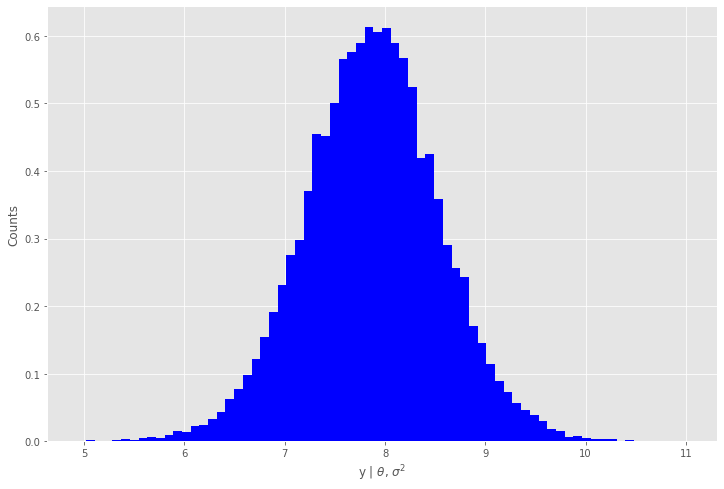

In [4]:
plt.figure(figsize=(12, 8))
plt.style.use('ggplot')
plt.hist(y_mc, bins = 70, color = 'blue', density = True)
plt.xlabel(r'y | $\theta$, $\sigma^2$')
plt.ylabel('Counts')
plt.show()

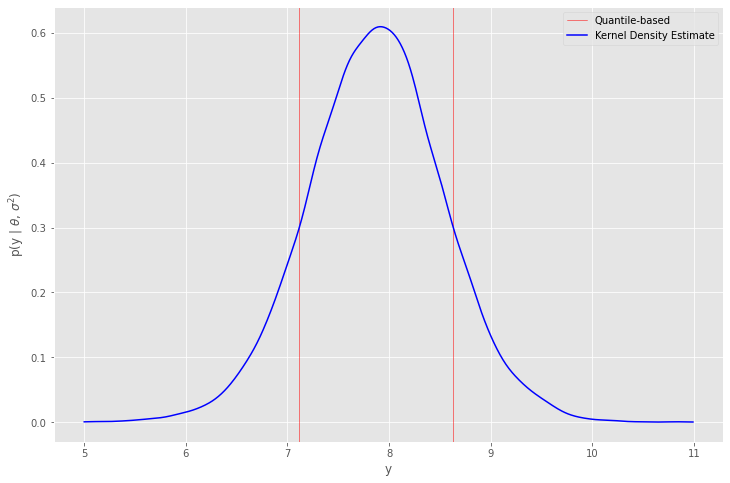

In [5]:
y = np.arange(5, 11, 0.01)
kde = gaussian_kde(y_mc, bw_method='silverman')
pdf_kde = kde(y)

plt.figure(figsize=(12, 8))
plt.style.use('ggplot')
plt.axvline(x=CI_75[0], color='r', linewidth=0.5, label = "Quantile-based")
plt.axvline(x=CI_75[1], color='r', linewidth=0.5)
plt.plot(y, pdf_kde, color='blue', label='Kernel Density Estimate')
plt.xlabel('y')
plt.ylabel(r'p(y | $\theta$, $\sigma^2$)')
plt.legend()
plt.show()

In [6]:
pdf_sort = pdf_kde.copy()
pdf_sort.sort()
pdf_sort = pdf_sort[::-1]
pdf_sort[-1]

0.00037159371460153423

In [7]:
pdf_kde[-1]

0.00039282247603535027

In [8]:
i = 0
while True:
    i += 1
    if 0.01 * pdf_sort[0:i].sum()>= 0.75:    
        break
        
pdf_HPD1 = pdf_sort[i-1]
pdf_HPD2 = pdf_sort[i]

In [9]:
CI_HPD = (np.round(y[np.where(pdf_kde == pdf_HPD1)][0],2), np.round(y[np.where(pdf_kde == pdf_HPD2)][0],2))
CI_HPD

(7.11, 8.64)

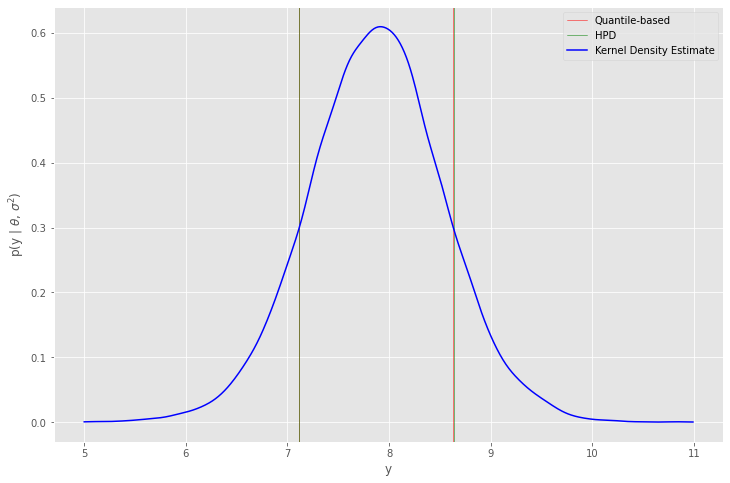

In [10]:
plt.figure(figsize=(12, 8))
plt.style.use('ggplot')
plt.axvline(x=CI_75[0], color='r', linewidth=0.5, label = "Quantile-based")
plt.axvline(x=CI_75[1], color='r', linewidth=0.5)
plt.axvline(x=CI_HPD[0], color='g', linewidth=0.5, label = "HPD")
plt.axvline(x=CI_HPD[1], color='g', linewidth=0.5)
plt.plot(y, pdf_kde, color='blue', label='Kernel Density Estimate')
plt.xlabel('y')
plt.ylabel(r'p(y | $\theta$, $\sigma^2$)')
plt.legend()
plt.show()

## Overall Comments

a. Sampled 30\*30\*30 = 27000 y values.  
b. Via Monte Carlo simulation.  
c. Used python instead of R. Little difference exists between CI_95 and CI_HPD.  
d. Domain Knowledge. Probably the data doesn't fit to typical models like conjugate normal model.

# Modified Ehrenfest Model

## Transition probability matrix P

In [11]:
P = np.array([[0.5, 0.5, 0, 0, 0, 0],
              [0.1, 0.5, 0.4, 0, 0, 0],
              [0, 0.2, 0.5, 0.3, 0, 0],
              [0, 0, 0.3, 0.5, 0.2, 0],
              [0, 0, 0, 0.4, 0.5, 0.1],
              [0, 0, 0, 0, 0.5, 0.5]])

## Calculating P^10, P^20, P^100

In [12]:
P_10 = P.copy()
for i in range (10-1):
    P_10=P_10.dot(P)

P_10

array([[0.04994957, 0.2084384 , 0.34220979, 0.275232  , 0.10784064,
        0.0163296 ],
       [0.04168768, 0.18683348, 0.33188992, 0.29159839, 0.1264224 ,
        0.02156813],
       [0.03422098, 0.16594496, 0.31997983, 0.30653184, 0.14579919,
        0.0275232 ],
       [0.0275232 , 0.14579919, 0.30653184, 0.31997983, 0.16594496,
        0.03422098],
       [0.02156813, 0.1264224 , 0.29159839, 0.33188992, 0.18683348,
        0.04168768],
       [0.0163296 , 0.10784064, 0.275232  , 0.34220979, 0.2084384 ,
        0.04994957]])

In [13]:
P_50 = P.copy()
for i in range (50-1):
    P_50=P_50.dot(P)

P_50

array([[0.03125223, 0.15625669, 0.31250446, 0.31249554, 0.15624331,
        0.03124777],
       [0.03125134, 0.15625401, 0.31250268, 0.31249732, 0.15624599,
        0.03124866],
       [0.03125045, 0.15625134, 0.31250089, 0.31249911, 0.15624866,
        0.03124955],
       [0.03124955, 0.15624866, 0.31249911, 0.31250089, 0.15625134,
        0.03125045],
       [0.03124866, 0.15624599, 0.31249732, 0.31250268, 0.15625401,
        0.03125134],
       [0.03124777, 0.15624331, 0.31249554, 0.31250446, 0.15625669,
        0.03125223]])

In [14]:
P_100 = P.copy()
for i in range (100-1):
    P_100=P_100.dot(P)

P_100

array([[0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125],
       [0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125],
       [0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125],
       [0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125],
       [0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125],
       [0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125]])

## Different Initial States

In [15]:
# Taking a look at two extreme initial states i=0 and i=5
IS_0 = np.array([1, 0, 0, 0, 0, 0])
IS_5 = np.array([0, 0, 0, 0, 0, 1])

### t = 10: different probabilities

In [16]:
IS_0.dot(P_10)

array([0.04994957, 0.2084384 , 0.34220979, 0.275232  , 0.10784064,
       0.0163296 ])

In [17]:
IS_5.dot(P_10)

array([0.0163296 , 0.10784064, 0.275232  , 0.34220979, 0.2084384 ,
       0.04994957])

### t = 100: (Almost) equal probabilities

In [18]:
IS_0.dot(P_100)

array([0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125])

In [19]:
IS_5.dot(P_100)

array([0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125])

### Visualization

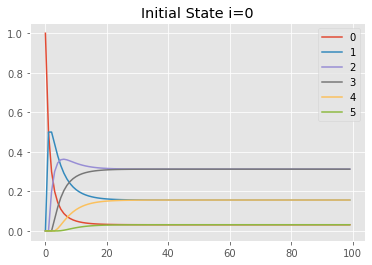

In [20]:
state = IS_0.copy()
stateHist = []

for x in range(100):
    stateHist.append(state)
    state = state.dot(P)
    
dfDistrHist = pd.DataFrame(stateHist)

dfDistrHist.plot()
plt.title('Initial State i=0')
plt.show()

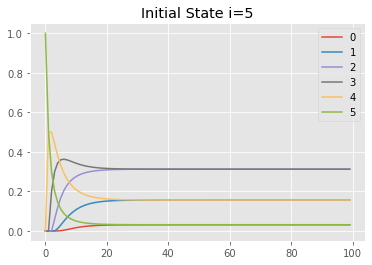

In [21]:
state = IS_5.copy()
stateHist = []

for x in range(100):
    stateHist.append(state)
    state = state.dot(P)
    
dfDistrHist = pd.DataFrame(stateHist)

dfDistrHist.plot()
plt.title('Initial State i=5')
plt.show()

### Comparing MCMC results and Binom(5,0.5)

{0: 1632, 1: 7964, 2: 15564, 3: 15426, 4: 7901, 5: 1514}


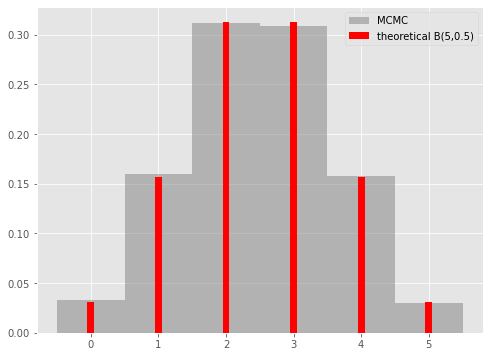

In [22]:
np.random.seed(1)
chain=0
chainHist=chain
for i in range(50000):
    pb=P[chain]
    pb=np.array(pb).flatten()
    chain=np.random.choice(6,1,p=pb)
    chainHist=np.append(chainHist,chain)

count={}
for i in chainHist:
    try: count[i] += 1
    except: count[i]=1
print(count)
plt.figure(figsize = (8,6))
plt.hist(chainHist, bins=np.linspace(-0.5,5.5,7),alpha=0.5, density=True, color = 'gray', label = 'MCMC')

#theoretical values
i = [0, 1, 2, 3, 4, 5]
p = [1/32, 5/32, 10/32, 10/32, 5/32, 1/32]
plt.bar(i,p, width = 0.1, color = 'r', label = 'theoretical B(5,0.5)')
plt.legend()
plt.show()